<a href="https://colab.research.google.com/github/mikvikpik/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# loading libraries that are/could be needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# loading data as pandas dataframe
# head is not in sync, needs header = None
# needs names for column headers
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                header = None, names = ['age', 'op_year', 'nodes', 'survived'])

In [0]:
# seeing preview of df
df.head()

,age,op_year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# validate appropriate obs
df.shape

(306, 4)

In [0]:
# validate missing values
df.isnull().sum()

age         0
op_year     0
nodes       0
survived    0
dtype: int64

In [0]:
# function to change not survived (2) to (0)
def notsurv(number):
    if number == 1:
        return 1
    else:
        return 0

In [0]:
# apply function to survived
df['survived']=df['survived'].apply(notsurv)

In [0]:
# proof of value change
df['survived'].value_counts()

1    225
0     81
Name: survived, dtype: int64

In [0]:
# printing head to validate data
df.head()

,age,op_year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

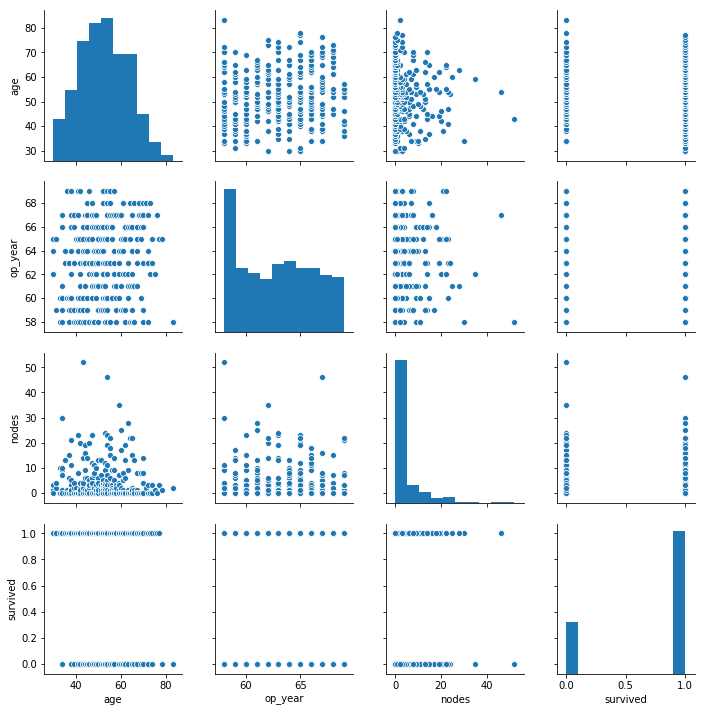

In [0]:
# using seaborn for general overview of data to see any basic baselines
sns.pairplot(df);

In [0]:
# using describe for general statistical data
# not usable for survived being [0,1] operator
# nodes looks interesting to look at based on max outlier and small std
df.describe()

,age,op_year,nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


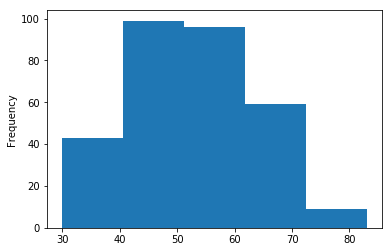

In [0]:
df['age'].plot.hist(bins=5);

In [0]:
#putting age into bins by decade
df['age_bins'] = pd.cut(df['age'], bins=[29,40,50,60,70,83])
df['age_bins'].head

In [0]:
# crosstab of age range and survived
ct_ab_surv = pd.crosstab(df['age_bins'], df['survived'])
ct_ab_surv

survived,0,1
age_bins,,
"(29, 40]",4,39
"(40, 50]",29,64
"(50, 60]",26,67
"(60, 70]",18,45
"(70, 83]",4,10


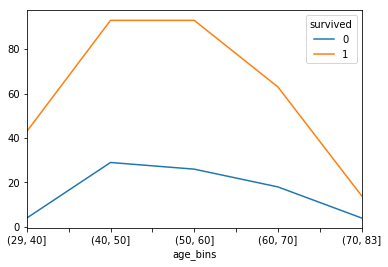

In [0]:
# plot of ct_ab_surv
ct_ab_surv.plot(stacked=True);

In [0]:
# operation year into bins by quartile from describe
df['op_bins'] = pd.cut(df['op_year'], bins=[57, 60, 63, 66, 69])
df['op_bins'].head()

In [0]:
# crosstab of survived by op year
ct_op_surv = pd.crosstab(df['op_bins'], df['survived'])
ct_op_surv

survived,0,1
op_bins,,
"(57, 60]",25,66
"(60, 63]",18,61
"(63, 66]",27,60
"(66, 69]",11,38


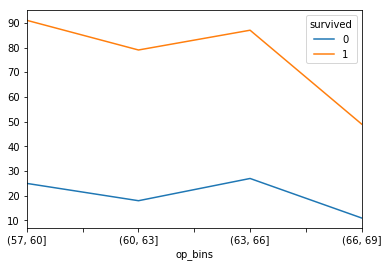

In [0]:
# plot of ct_op_surv
ct_op_surv.plot(stacked=True);

In [0]:
# crosstab of survivors by the age they were and the years they were operated on binned
ct_surv_age_year = pd.crosstab(df['op_bins'], [df['survived'], df['age_bins']],
                              rownames = ['years operated'],
                              colnames = ['survived', 'age'],
                              normalize = 'index')
ct_surv_age_year

survived               0                      ...         1                    
age             (29, 40]  (40, 50]  (50, 60]  ...  (50, 60]  (60, 70]  (70, 83]
years operated                                ...                              
(57, 60]        0.010989  0.087912  0.087912  ...  0.208791  0.120879  0.010989
(60, 63]        0.000000  0.075949  0.075949  ...  0.215190  0.126582  0.037975
(63, 66]        0.022989  0.114943  0.103448  ...  0.206897  0.172414  0.022989
(66, 69]        0.020408  0.102041  0.061224  ...  0.265306  0.183673  0.081633

[4 rows x 10 columns]

In [0]:
# crosstab same as above without year binned
ct_surv_age_year2 = pd.crosstab(df['op_year'], [df['survived'], df['age_bins']],
                              rownames = ['years operated'],
                              colnames = ['survived', 'age'],
                              normalize = 'index')
ct_surv_age_year2

survived               0                      ...         1                    
age             (29, 40]  (40, 50]  (50, 60]  ...  (50, 60]  (60, 70]  (70, 83]
years operated                                ...                              
58              0.000000  0.138889  0.027778  ...  0.194444  0.138889  0.027778
59              0.037037  0.074074  0.185185  ...  0.111111  0.185185  0.000000
60              0.000000  0.035714  0.071429  ...  0.321429  0.035714  0.000000
61              0.000000  0.000000  0.038462  ...  0.269231  0.192308  0.000000
62              0.000000  0.086957  0.130435  ...  0.217391  0.086957  0.086957
63              0.000000  0.133333  0.066667  ...  0.166667  0.100000  0.033333
64              0.000000  0.193548  0.032258  ...  0.322581  0.096774  0.032258
65              0.000000  0.107143  0.214286  ...  0.071429  0.142857  0.035714
66              0.071429  0.035714  0.071429  ...  0.214286  0.285714  0.000000
67              0.000000  0.120000  0.000000  ...  0.280000  0.160000  0.080000
68              0.000000  0.000000  0.153846  ...  0.076923  0.384615  0.153846
69              0.090909  0.181818  0.090909  ...  0.454545  0.000000  0.000000

[12 rows x 10 columns]

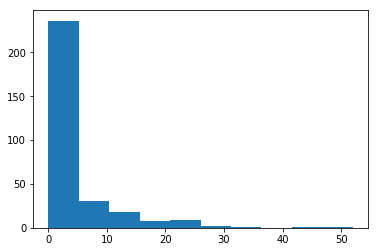

In [0]:
plt.hist(df['nodes']);

In [0]:
def nodes_used(number):
    if number == 0:
        return False
    else:
        return True

In [0]:
df['nodes_used'] = df['nodes'].apply(nodes_used)

In [0]:
df['nodes_used'].head()

0     True
1     True
2    False
3     True
4     True
Name: nodes_used, dtype: bool

In [0]:
ct_surv_age_nodes = pd.crosstab(df['nodes_used'], [df['survived'], df['age_bins']])

In [0]:
ct_surv_age_nodes

survived          0                    ...        1                  
age_bins   (29, 40] (40, 50] (50, 60]  ... (50, 60] (60, 70] (70, 83]
nodes_used                             ...                           
False             2       10        1  ...       30       35        6
True              2       19       25  ...       37       10        4

[2 rows x 10 columns]

In [0]:
ct_surv_year_nodes = pd.crosstab(df['nodes_used'], [df['survived'], df['op_year']])

In [0]:
ct_surv_year_nodes

survived    0                              ...   1                                 
op_year    58 59 60 61 62 63 64  65 66 67  ...  60  61 62  63  64  65  66  67 68 69
nodes_used                                 ...                                     
False       4  2  0  0  1  2  4   3  2  1  ...  11  11  8  12  13  10  13  10  8  3
True        8  7  4  3  6  6  4  10  4  3  ...  13  12  8  10  10   5   9  11  2  4

[2 rows x 24 columns]

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
<br>The younger the person is, the higher the likelyhood of surviving more than 5 year. And those who had surgery in 60, 61, 67, and 68 had the best chances of survival. Based on ct_ab_surv, ct_surv_age_year2

- What is at least one feature that looks to have a negative relationship with survival?
<br> Years 58 and 65 had more percentage of deaths across all ages. Based on ct_surv_age_year2

- How are those two features related with each other, and what might that mean?<br>  The survival and years had a direct relationship with what looks like the nodes used that year. In 60 and 61, nodes were used in all cases where there was no survival and fewer deaths occured as with year 68 and 69. However, it cannot be stated explicitly that nodes prevented death because many who survived had no use of nodes. Based on ct_surv_year_nodes

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.